# Exploratory Data Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown
from sklearn.preprocessing import MinMaxScaler

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

### Loading IDS2017 DDoS data from Wednesday converted by CICFlowMeter

In [2]:
df = pd.read_csv(
    './data/IDS2017Data/netflow_data/Wednesday-workingHours.pcap_ISCX.csv')
print df.shape
df.sample(100)

/home/talhajavaid32/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(692703, 85)


Flow ID       Source IP  \
519662    192.168.10.3-192.168.10.14-53-55958-17   192.168.10.14   
449150   162.208.20.178-192.168.10.5-443-55225-6    192.168.10.5   
113167       172.16.0.1-192.168.10.50-54470-80-6      172.16.0.1   
376615    192.168.10.15-52.201.71.58-56184-443-6   192.168.10.15   
295272       172.16.0.1-192.168.10.50-50442-80-6      172.16.0.1   
158438       172.16.0.1-192.168.10.50-60302-80-6      172.16.0.1   
568484    192.168.10.3-192.168.10.12-53-46358-17   192.168.10.12   
552344   192.168.10.19-120.50.136.181-55934-80-6   192.168.10.19   
495096     192.168.10.1-192.168.10.3-53-61264-17    192.168.10.3   
651348     192.168.10.3-192.168.10.9-53-51734-17    192.168.10.9   
61744        172.16.0.1-192.168.10.50-53958-80-6      172.16.0.1   
463831   172.217.12.206-192.168.10.14-80-56582-6   192.168.10.14   
652208  192.168.10.51-54.172.47.69-45735-3478-17   192.168.10.51   
453921    162.208.22.34-192.168.10.5-443-56860-6    192.168.10.5   
266109       172.16.0.1-192.168.10.50-39730-80-6      172.16.0.1   
324341     192.168.10.1-192.168.10.3-53-62405-17    192.168.10.3   
77557        172.16.0.1-192.168.10.50-53874-80-6      172.16.0.1   
305226       172.16.0.1-192.168.10.50-34782-80-6      172.16.0.1   
24283      192.168.10.1-192.168.10.3-53-61399-17    192.168.10.3   
197457       172.16.0.1-192.168.10.50-58508-80-6      172.16.0.1   
210062       172.16.0.1-192.168.10.50-47830-80-6      172.16.0.1   
530750     192.168.10.12-52.87.7.157-44308-443-6     52.87.7.157   
63482   192.168.10.12-192.229.173.26-47702-443-6  192.229.173.26   
249502       172.16.0.1-192.168.10.50-42462-80-6      172.16.0.1   
649030  172.217.12.194-192.168.10.51-443-43669-6  172.217.12.194   
500153     192.168.10.1-192.168.10.3-53-61551-17    192.168.10.3   
83832        172.16.0.1-192.168.10.50-59492-80-6      172.16.0.1   
57187      178.255.83.1-192.168.10.12-80-41204-6   192.168.10.12   
523763       172.16.0.1-192.168.10.50-33812-80-6      172.16.0.1   
345923    192.168.10.3-192.168.10.15-53-61872-17   192.168.10.15   
...                                          ...             ...   
608328     192.168.10.3-192.168.10.9-53-53684-17    192.168.10.9   
583075      192.168.10.8-23.61.187.27-61124-80-6    23.61.187.27   
244494       172.16.0.1-192.168.10.50-38880-80-6      172.16.0.1   
102387       172.16.0.1-192.168.10.50-46550-80-6      172.16.0.1   
35677    192.168.10.19-69.172.216.55-53772-443-6   192.168.10.19   
287965       172.16.0.1-192.168.10.50-39516-80-6      172.16.0.1   
351605   172.217.10.70-192.168.10.25-443-51458-6   172.217.10.70   
308776  192.168.10.15-209.85.144.154-54604-443-6   192.168.10.15   
472181   192.168.10.8-23.194.141.179-60872-443-6  23.194.141.179   
685026     192.168.10.1-192.168.10.3-53-61677-17    192.168.10.3   
138285       172.16.0.1-192.168.10.50-33736-80-6      172.16.0.1   
312976       172.16.0.1-192.168.10.50-38922-80-6      172.16.0.1   
484410  172.217.10.131-192.168.10.15-443-57060-6   192.168.10.15   
652389    172.217.11.2-192.168.10.16-443-49034-6    172.217.11.2   
318449       172.16.0.1-192.168.10.50-43902-80-6      172.16.0.1   
408362    192.168.10.19-66.150.48.61-54329-443-6   192.168.10.19   
124879       172.16.0.1-192.168.10.50-43358-80-6      172.16.0.1   
577640    192.168.10.3-192.168.10.16-53-34910-17   192.168.10.16   
379006  151.101.128.67-192.168.10.14-443-54372-6  151.101.128.67   
612438     192.168.10.3-192.168.10.9-53-61032-17    192.168.10.9   
207142       172.16.0.1-192.168.10.50-44442-80-6      172.16.0.1   
274907       172.16.0.1-192.168.10.50-49376-80-6      172.16.0.1   
297271       172.16.0.1-192.168.10.50-52406-80-6      172.16.0.1   
193664       172.16.0.1-192.168.10.50-53696-80-6      172.16.0.1   
503421     178.255.83.1-192.168.10.15-80-57699-6   192.168.10.15   
407200   192.168.10.12-192.82.243.71-52132-443-6   192.168.10.12   
220581       172.16.0.1-192.168.10.50-34050-80-6      172.16.0.1   
464628    192.168.10.19-23.20

#### Fix column headers

In [5]:
df.columns = df.columns.str.lower().str.strip().str.replace(
    ' ', '_').str.replace('/s', '').str.replace('/', '_').str.replace('.', '_')

In [6]:
cols = list(df.columns)
cols.remove('fwd_header_length_1')
df = df[cols]

In [7]:
# Column 20 and 21 have mixed type: convert to float64
df.iloc[:,[20,21]] = df.iloc[:,[20,21]].astype('float64')

/home/talhajavaid32/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### Filter out heartbleed

In [8]:
df = df[df.label != 'Heartbleed']

#### Features

In [9]:
# Get list of cols having type object
object_cols = list(df.dtypes[df.dtypes == 'object'].keys())
# Filter them out from all_cols list
all_cols = cols
feat = list(filter(lambda x: x not in object_cols, all_cols))
categfeat = ['source_port', 'destination_port', 'protocol']
feat = list(filter(lambda x: x not in categfeat, feat))

In [10]:
display(feat, len(feat))

['flow_duration',
 'total_fwd_packets',
 'total_backward_packets',
 'total_length_of_fwd_packets',
 'total_length_of_bwd_packets',
 'fwd_packet_length_max',
 'fwd_packet_length_min',
 'fwd_packet_length_mean',
 'fwd_packet_length_std',
 'bwd_packet_length_max',
 'bwd_packet_length_min',
 'bwd_packet_length_mean',
 'bwd_packet_length_std',
 'flow_bytes',
 'flow_packets',
 'flow_iat_mean',
 'flow_iat_std',
 'flow_iat_max',
 'flow_iat_min',
 'fwd_iat_total',
 'fwd_iat_mean',
 'fwd_iat_std',
 'fwd_iat_max',
 'fwd_iat_min',
 'bwd_iat_total',
 'bwd_iat_mean',
 'bwd_iat_std',
 'bwd_iat_max',
 'bwd_iat_min',
 'fwd_psh_flags',
 'bwd_psh_flags',
 'fwd_urg_flags',
 'bwd_urg_flags',
 'fwd_header_length',
 'bwd_header_length',
 'fwd_packets',
 'bwd_packets',
 'min_packet_length',
 'max_packet_length',
 'packet_length_mean',
 'packet_length_std',
 'packet_length_variance',
 'fin_flag_count',
 'syn_flag_count',
 'rst_flag_count',
 'psh_flag_count',
 'ack_flag_count',
 'urg_flag_count',
 'cwe_flag_cou

76

In [11]:
# Dropping NaNs and Infs
df = df[~(df.isnull().any(axis=1) | (df == float('Inf')).any(axis=1))]

### Split data into slowloris and hulk

In [12]:
df.label.unique()

array(['BENIGN', 'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk',
       'DoS GoldenEye'], dtype=object)

In [13]:
slowlorisdf = df[df.label == 'DoS slowloris']
hulkdf = df[df.label == 'DoS Hulk']
display(slowlorisdf.shape, hulkdf.shape)

(5796, 84)

(230124, 84)

## Load Simulator data converted by CICFlowMeter

In [14]:
slowlorissimdf = pd.read_csv('./data/slowloris_simulator_attack_data.csv')
hulksimdf = pd.read_csv('./data/hulk_simulator_attack_data.csv')

In [15]:
display(slowlorissimdf.shape)
display(hulksimdf.shape)

(2073, 84)

(4011, 84)

In [16]:
slowlorissimdf.columns = df.columns
hulksimdf.columns = df.columns

In [22]:
slowlorissimdf = slowlorissimdf[(slowlorissimdf.source_ip == '192.168.1.8') & (slowlorissimdf.destination_ip == '192.168.1.5') & (slowlorissimdf.destination_port == 80)] 
hulksimdf = hulksimdf[(hulksimdf.source_ip == '192.168.1.8') & (hulksimdf.destination_ip == '192.168.1.5') & (hulksimdf.destination_port == 80)] 

## Feature wise comparison of Simulator and IDS data Hulk

In [24]:
stats = ['mean', 'std', 'min', 'max']
for f in feat:
    display(Markdown('__%s__'%(f)))
    hulkstats = pd.DataFrame()
    for s in stats:
        hulkstats.loc[s, 'ids'] = hulkdf[f].agg(s)
        hulkstats.loc[s, 'simulator'] = hulksimdf[f].agg(s)
    display(hulkstats)

__flow_duration__

ids     simulator
mean  5.731713e+07  1.874885e+07
std   4.596649e+07  2.134425e+07
min   1.000000e+00  2.800000e+01
max   1.199686e+08  7.304715e+07

__total_fwd_packets__

ids  simulator
mean   5.293181   3.175509
std    2.562429   2.555954
min    1.000000   1.000000
max   16.000000  18.000000

__total_backward_packets__

ids  simulator
mean   4.223032   2.795188
std    2.919121   3.420811
min    0.000000   0.000000
max   11.000000  29.000000

__total_length_of_fwd_packets__

ids    simulator
mean   282.491587   191.299506
std    266.373249   307.592766
min      0.000000     0.000000
max   3489.000000  2149.000000

__total_length_of_bwd_packets__

ids     simulator
mean   7802.763832   1644.941703
std    5439.693504   3769.244552
min       0.000000      0.000000
max   13043.000000  31663.000000

__fwd_packet_length_max__

ids   simulator
mean  233.759617  129.192165
std   164.179555  170.813027
min     0.000000    0.000000
max   508.000000  416.000000

__fwd_packet_length_min__

ids   simulator
mean  0.207253    2.228563
std   1.095706   27.707622
min   0.000000    0.000000
max   6.000000  404.000000

__fwd_packet_length_mean__

ids   simulator
mean   44.590721   41.303526
std    39.515616   63.296364
min     0.000000    0.000000
max   317.250000  404.000000

__fwd_packet_length_std__

ids   simulator
mean   96.462075   64.565823
std    70.645358   88.788514
min     0.000000    0.000000
max   244.219164  291.327994

__bwd_packet_length_max__

ids    simulator
mean   4021.293172   296.544109
std    3125.678092   533.366544
min       0.000000     0.000000
max   11595.000000  1448.000000

__bwd_packet_length_min__

ids    simulator
mean     0.020263    15.732264
std      5.229583    91.863242
min      0.000000     0.000000
max   1448.000000  1448.000000

__bwd_packet_length_mean__

ids    simulator
mean  1286.724958   195.787709
std    927.428310   380.666800
min      0.000000     0.000000
max   3865.000000  1448.000000

__bwd_packet_length_std__

ids   simulator
mean  1645.092721  129.472223
std   1326.114975  228.360457
min      0.000000    0.000000
max   6694.376371  836.003190

__flow_bytes__

ids     simulator
mean  2.940172e+04    246.839321
std   3.240862e+05   1689.350310
min   0.000000e+00      0.000000
max   1.260000e+07  32253.013935

__flow_packets__

ids     simulator
mean  1.825119e+05   9566.254772
std   4.461808e+05  17669.648144
min   1.748631e-02      0.027380
max   3.000000e+06  71428.571429

__flow_iat_mean__

ids     simulator
mean  4.799159e+06  5.586735e+06
std   4.041106e+06  1.179993e+07
min   5.000000e-01  2.800000e+01
max   1.140000e+08  7.304715e+07

__flow_iat_std__

ids     simulator
mean  1.641207e+07  4.852101e+06
std   1.325117e+07  7.523913e+06
min   0.000000e+00  0.000000e+00
max   8.370000e+07  4.942326e+07

__flow_iat_max__

ids     simulator
mean  5.692731e+07  1.417859e+07
std   4.560324e+07  1.722569e+07
min   1.000000e+00  2.800000e+01
max   1.180000e+08  7.304715e+07

__flow_iat_min__

ids     simulator
mean  7.544292e+02  2.952856e+06
std   2.445629e+05  1.153142e+07
min  -1.300000e+01  1.000000e+00
max   1.140000e+08  7.304715e+07

__fwd_iat_total__

ids     simulator
mean  5.724528e+07  1.691556e+07
std   4.593790e+07  2.070097e+07
min   0.000000e+00  0.000000e+00
max   1.200000e+08  7.304715e+07

__fwd_iat_mean__

ids     simulator
mean  1.013597e+07  6.723286e+06
std   8.815472e+06  1.176407e+07
min   0.000000e+00  0.000000e+00
max   1.140000e+08  7.304715e+07

__fwd_iat_std__

ids     simulator
mean  2.373772e+07  5.086053e+06
std   1.941304e+07  8.118360e+06
min   0.000000e+00  0.000000e+00
max   8.370000e+07  4.942326e+07

__fwd_iat_max__

ids     simulator
mean  5.691590e+07  1.266632e+07
std   4.561600e+07  1.638400e+07
min   0.000000e+00  0.000000e+00
max   1.180000e+08  7.304715e+07

__fwd_iat_min__

ids     simulator
mean  9.657866e+02  3.118484e+06
std   2.445661e+05  1.126721e+07
min  -8.000000e+00  0.000000e+00
max   1.140000e+08  7.304715e+07

__bwd_iat_total__

ids     simulator
mean  1.844440e+07  6.995756e+06
std   3.728342e+07  1.391322e+07
min   0.000000e+00  0.000000e+00
max   1.200000e+08  6.891331e+07

__bwd_iat_mean__

ids     simulator
mean  3.218027e+06  2.555973e+06
std   6.665995e+06  6.685779e+06
min   0.000000e+00  0.000000e+00
max   1.170000e+08  6.594136e+07

__bwd_iat_std__

ids     simulator
mean  7.608198e+06  1.915023e+06
std   1.545697e+07  4.464753e+06
min   0.000000e+00  0.000000e+00
max   6.670000e+07  4.859179e+07

__bwd_iat_max__

ids     simulator
mean  1.840074e+07  5.420856e+06
std   3.722275e+07  1.054993e+07
min   0.000000e+00  0.000000e+00
max   1.180000e+08  6.871961e+07

__bwd_iat_min__

ids     simulator
mean  4.105264e+04  1.354613e+06
std   1.504338e+06  5.953692e+06
min   0.000000e+00  0.000000e+00
max   1.170000e+08  6.594136e+07

__fwd_psh_flags__

ids  simulator
mean  0.0   0.227329
std   0.0   0.419171
min   0.0   0.000000
max   0.0   1.000000

__bwd_psh_flags__

ids  simulator
mean  0.0        0.0
std   0.0        0.0
min   0.0        0.0
max   0.0        0.0

__fwd_urg_flags__

ids  simulator
mean  0.0        0.0
std   0.0        0.0
min   0.0        0.0
max   0.0        0.0

__bwd_urg_flags__

ids  simulator
mean  0.0        0.0
std   0.0        0.0
min   0.0        0.0
max   0.0        0.0

__fwd_header_length__

ids   simulator
mean  166.124976  105.230105
std    84.048784   86.317951
min    20.000000   32.000000
max   520.000000  624.000000

__bwd_header_length__

ids   simulator
mean  140.530218   93.021592
std    97.030572  111.381874
min     0.000000    0.000000
max   360.000000  944.000000

__fwd_packets__

ids     simulator
mean  1.820856e+05   4769.141618
std   4.455225e+05   8827.245852
min   1.748631e-02      0.014498
max   3.000000e+06  35714.285714

__bwd_packets__

ids     simulator
mean      426.284449   4797.113154
std     12173.658352   8848.454618
min         0.000000      0.000000
max   1000000.000000  35714.285714

__min_packet_length__

ids  simulator
mean  0.003937        0.0
std   0.153645        0.0
min   0.000000        0.0
max   6.000000        0.0

__max_packet_length__

ids    simulator
mean   4021.525143   322.027761
std    3125.379852   528.504144
min       0.000000     0.000000
max   11595.000000  1448.000000

__packet_length_mean__

ids   simulator
mean   594.201667  134.679396
std    427.656772  237.858886
min      0.000000    0.000000
max   1710.714286  991.000000

__packet_length_std__

ids   simulator
mean  1222.173033  147.332865
std    923.340266  238.810018
min      0.000000    0.000000
max   4364.022571  725.872861

__packet_length_variance__

ids      simulator
mean  2.346291e+06   78719.606558
std   2.249460e+06  158691.234617
min   0.000000e+00       0.000000
max   1.900000e+07  526891.410714

__fin_flag_count__

ids  simulator
mean  0.256105   0.100864
std   0.436482   0.301195
min   0.000000   0.000000
max   1.000000   1.000000

__syn_flag_count__

ids  simulator
mean  0.0   0.227329
std   0.0   0.419171
min   0.0   0.000000
max   0.0   1.000000

__rst_flag_count__

ids  simulator
mean  0.0        0.0
std   0.0        0.0
min   0.0        0.0
max   0.0        0.0

__psh_flag_count__

ids  simulator
mean  0.063392   0.270204
std   0.243667   0.444133
min   0.000000   0.000000
max   1.000000   1.000000

__ack_flag_count__

ids  simulator
mean  0.681441   0.707896
std   0.465918   0.454800
min   0.000000   0.000000
max   1.000000   1.000000

__urg_flag_count__

ids  simulator
mean  0.000661   0.348550
std   0.025692   0.476585
min   0.000000   0.000000
max   1.000000   1.000000

__cwe_flag_count__

ids  simulator
mean  0.0        0.0
std   0.0        0.0
min   0.0        0.0
max   0.0        0.0

__ece_flag_count__

ids  simulator
mean  0.0        0.0
std   0.0        0.0
min   0.0        0.0
max   0.0        0.0

__down_up_ratio__

ids  simulator
mean  0.384493   0.665330
std   0.556146   0.711323
min   0.000000   0.000000
max   2.000000   7.000000

__average_packet_size__

ids    simulator
mean   642.646781   148.296845
std    465.457526   257.489694
min      0.000000     0.000000
max   1995.833333  1087.625000

__avg_fwd_segment_size__

ids   simulator
mean   44.590721   41.303526
std    39.515616   63.296364
min     0.000000    0.000000
max   317.250000  404.000000

__avg_bwd_segment_size__

ids    simulator
mean  1286.724958   195.787709
std    927.428310   380.666800
min      0.000000     0.000000
max   3865.000000  1448.000000

__fwd_avg_bytes_bulk__

ids  simulator
mean  0.0        0.0
std   0.0        0.0
min   0.0        0.0
max   0.0        0.0

__fwd_avg_packets_bulk__

ids  simulator
mean  0.0        0.0
std   0.0        0.0
min   0.0        0.0
max   0.0        0.0

__fwd_avg_bulk_rate__

ids  simulator
mean  0.0        0.0
std   0.0        0.0
min   0.0        0.0
max   0.0        0.0

__bwd_avg_bytes_bulk__

ids  simulator
mean  0.0        0.0
std   0.0        0.0
min   0.0        0.0
max   0.0        0.0

__bwd_avg_packets_bulk__

ids  simulator
mean  0.0        0.0
std   0.0        0.0
min   0.0        0.0
max   0.0        0.0

__bwd_avg_bulk_rate__

ids  simulator
mean  0.0        0.0
std   0.0        0.0
min   0.0        0.0
max   0.0        0.0

__subflow_fwd_packets__

ids  simulator
mean   5.293181   3.175509
std    2.562429   2.555954
min    1.000000   1.000000
max   16.000000  18.000000

__subflow_fwd_bytes__

ids    simulator
mean   282.491587   191.299506
std    266.373249   307.592766
min      0.000000     0.000000
max   3489.000000  2149.000000

__subflow_bwd_packets__

ids  simulator
mean   4.223032   2.795188
std    2.919121   3.420811
min    0.000000   0.000000
max   11.000000  29.000000

__subflow_bwd_bytes__

ids     simulator
mean   7802.763832   1644.941703
std    5439.693504   3769.244552
min       0.000000      0.000000
max   13043.000000  31663.000000

__init_win_bytes_forward__

ids     simulator
mean   2028.188433   8064.185996
std    7068.980694  12862.750122
min       0.000000      0.000000
max   29200.000000  29200.000000

__init_win_bytes_backward__

ids     simulator
mean    198.532000   6142.889883
std     956.374735  11636.628216
min      -1.000000     -1.000000
max   28960.000000  28960.000000

__act_data_pkt_fwd__

ids  simulator
mean   1.319536   0.327267
std    1.207389   0.730980
min    0.000000   0.000000
max   10.000000   6.000000

__min_seg_size_forward__

ids  simulator
mean  27.481671  31.786552
std    5.814189   1.911034
min   20.000000  20.000000
max   32.000000  40.000000

__active_mean__

ids     simulator
mean  3.022654e+03  3.679555e+04
std   1.027384e+04  1.569985e+05
min   0.000000e+00  0.000000e+00
max   1.509321e+06  2.208520e+06

__active_std__

ids     simulator
mean  1.589908e+02  2.382211e+04
std   1.228055e+04  1.583873e+05
min   0.000000e+00  0.000000e+00
max   2.121975e+06  2.294019e+06

__active_max__

ids     simulator
mean  3.135077e+03  6.036533e+04
std   1.822695e+04  2.959298e+05
min   0.000000e+00  0.000000e+00
max   3.004642e+06  3.244373e+06

__active_min__

ids     simulator
mean    2910.230172  2.083536e+04
std     5449.205201  1.146921e+05
min        0.000000  0.000000e+00
max   221017.000000  2.208520e+06

__idle_mean__

ids     simulator
mean  5.633392e+07  5.429682e+06
std   4.534261e+07  9.707120e+06
min   0.000000e+00  0.000000e+00
max   1.180000e+08  6.895180e+07

__idle_std__

ids     simulator
mean  8.138047e+05  8.297705e+05
std   6.893255e+06  2.879853e+06
min   0.000000e+00  0.000000e+00
max   6.080000e+07  3.310989e+07

__idle_max__

ids     simulator
mean  5.690935e+07  6.127157e+06
std   4.562538e+07  1.082135e+07
min   0.000000e+00  0.000000e+00
max   1.180000e+08  6.895180e+07

__idle_min__

ids     simulator
mean  5.575802e+07  4.819259e+06
std   4.558269e+07  9.113438e+06
min   0.000000e+00  0.000000e+00
max   1.180000e+08  6.895180e+07

## Feature wise comparison of Simulator and IDS data Slowloris

In [25]:
stats = ['mean', 'std', 'min', 'max']
for f in feat:
    display(Markdown('__%s__'%(f)))
    slowlorisstats = pd.DataFrame()
    for s in stats:
        slowlorisstats.loc[s, 'ids'] = slowlorisdf[f].agg(s)
        slowlorisstats.loc[s, 'simulator'] = slowlorissimdf[f].agg(s)
    display(slowlorisstats)

__flow_duration__

ids     simulator
mean  5.655437e+07  2.722806e+07
std   4.951522e+07  7.170674e+06
min   2.000000e+00  2.048003e+07
max   1.190461e+08  8.686762e+07

__total_fwd_packets__

ids  simulator
mean   6.337129   4.101000
std    5.749611   0.692126
min    1.000000   3.000000
max   16.000000  14.000000

__total_backward_packets__

ids  simulator
mean   1.655797   4.984000
std    1.262611   0.140548
min    0.000000   4.000000
max   11.000000   6.000000

__total_length_of_fwd_packets__

ids    simulator
mean   810.692029   253.190000
std   1145.379144   132.408088
min      0.000000   231.000000
max   3146.000000  2318.000000

__total_length_of_bwd_packets__

ids  simulator
mean     20.585921      462.0
std     269.653455        0.0
min       0.000000      462.0
max   14556.000000      462.0

__fwd_packet_length_max__

ids   simulator
mean   94.908730  231.004000
std   111.818344    0.178885
min     0.000000  231.000000
max   467.000000  239.000000

__fwd_packet_length_min__

ids  simulator
mean    5.108868        0.0
std    26.203854        0.0
min     0.000000        0.0
max   239.000000        0.0

__fwd_packet_length_mean__

ids   simulator
mean   63.098248   60.627679
std    78.488198   10.089322
min     0.000000   39.833333
max   239.000000  173.916667

__fwd_packet_length_std__

ids   simulator
mean   41.284782  114.084597
std    51.914119    3.935684
min     0.000000   93.706812
max   221.278065  133.367912

__bwd_packet_length_max__

ids  simulator
mean    16.427019      462.0
std    129.182999        0.0
min      0.000000      462.0
max   5792.000000      462.0

__bwd_packet_length_min__

ids  simulator
mean  0.002070        0.0
std   0.111446        0.0
min   0.000000        0.0
max   6.000000        0.0

__bwd_packet_length_mean__

ids   simulator
mean     7.264026   92.785000
std     46.742300    3.152149
min      0.000000   77.000000
max   1339.285714  115.500000

__bwd_packet_length_std__

ids   simulator
mean    10.416272  207.015649
std     65.576188    3.346147
min      0.000000  188.610710
max   2067.882872  231.000000

__flow_bytes__

ids  simulator
mean  4.392122e+04  27.573359
std   2.668560e+05   6.111878
min   0.000000e+00  17.594668
max   6.155172e+06  57.045203

__flow_packets__

ids  simulator
mean     4231.879565   0.351843
std     20684.985563   0.075716
min         0.025890   0.180557
max   1000000.000000   0.491350

__flow_iat_mean__

ids     simulator
mean  1.020727e+07  3.374112e+06
std   1.340581e+07  8.477294e+05
min   2.000000e+00  2.204810e+06
max   5.790000e+07  6.461484e+06

__flow_iat_std__

ids     simulator
mean  1.779909e+07  8.652666e+06
std   2.282801e+07  1.895322e+06
min   0.000000e+00  5.602391e+06
max   8.190000e+07  1.582715e+07

__flow_iat_max__

ids     simulator
mean  4.029260e+07  2.416603e+07
std   3.996824e+07  5.380721e+06
min   2.000000e+00  1.539687e+07
max   1.190000e+08  3.973464e+07

__flow_iat_min__

ids  simulator
mean  2.869085e+05   8.393000
std   5.085708e+05   4.007316
min   1.000000e+00   2.000000
max   1.280000e+07  45.000000

__fwd_iat_total__

ids     simulator
mean  5.664861e+07  3.679584e+06
std   4.961533e+07  6.751716e+06
min   0.000000e+00  2.400000e+02
max   1.190000e+08  5.442393e+07

__fwd_iat_mean__

ids     simulator
mean  2.470495e+07  1.129858e+06
std   3.970494e+07  2.008341e+06
min   0.000000e+00  1.200000e+02
max   1.190000e+08  9.068224e+06

__fwd_iat_std__

ids     simulator
mean  6.091325e+06  1.968340e+06
std   9.924181e+06  3.511059e+06
min   0.000000e+00  9.192388e+00
max   7.140000e+07  1.570599e+07

__fwd_iat_max__

ids     simulator
mean  4.028856e+07  3.537879e+06
std   3.997205e+07  6.312963e+06
min   0.000000e+00  1.610000e+02
max   1.190000e+08  2.720394e+07

__fwd_iat_min__

ids    simulator
mean  2.138649e+07   137.647000
std   4.111221e+07   279.901863
min   0.000000e+00    72.000000
max   1.190000e+08  9205.000000

__bwd_iat_total__

ids     simulator
mean  5.217117e+07  2.716391e+07
std   5.101386e+07  7.130272e+06
min   0.000000e+00  2.048001e+07
max   1.190000e+08  8.686760e+07

__bwd_iat_mean__

ids     simulator
mean  3.527604e+07  6.830579e+06
std   3.905410e+07  1.798701e+06
min   0.000000e+00  5.120003e+06
max   1.190000e+08  1.737352e+07

__bwd_iat_std__

ids     simulator
mean  1.013408e+07  1.205371e+07
std   1.539701e+07  2.749636e+06
min   0.000000e+00  7.406761e+06
max   7.640000e+07  2.238291e+07

__bwd_iat_max__

ids     simulator
mean  4.297512e+07  2.417019e+07
std   4.329122e+07  5.380693e+06
min   0.000000e+00  1.539687e+07
max   1.190000e+08  3.973464e+07

__bwd_iat_min__

ids   simulator
mean  2.824096e+07   19.346500
std   3.811923e+07   13.042718
min   0.000000e+00    2.000000
max   1.190000e+08  192.000000

__fwd_psh_flags__

ids  simulator
mean  0.316943        0.0
std   0.465325        0.0
min   0.000000        0.0
max   1.000000        0.0

__bwd_psh_flags__

ids  simulator
mean  0.0        0.0
std   0.0        0.0
min   0.0        0.0
max   0.0        0.0

__fwd_urg_flags__

ids  simulator
mean  0.0        0.0
std   0.0        0.0
min   0.0        0.0
max   0.0        0.0

__bwd_urg_flags__

ids  simulator
mean  0.0        0.0
std   0.0        0.0
min   0.0        0.0
max   0.0        0.0

__fwd_header_length__

ids   simulator
mean  214.657005  139.668000
std   187.058680   23.160613
min    32.000000  104.000000
max   536.000000  456.000000

__bwd_header_length__

ids   simulator
mean   55.044168  167.504000
std    42.282032    4.625655
min     0.000000  136.000000
max   360.000000  208.000000

__fwd_packets__

ids  simulator
mean    2101.824901   0.158073
std    10342.930832   0.034740
min        0.016804   0.077382
max   500000.000000   0.302369

__bwd_packets__

ids  simulator
mean    2130.054664   0.193770
std    10348.546498   0.042929
min        0.000000   0.069071
max   500000.000000   0.244140

__min_packet_length__

ids  simulator
mean  0.004141        0.0
std   0.157581        0.0
min   0.000000        0.0
max   6.000000        0.0

__max_packet_length__

ids  simulator
mean   106.310386      462.0
std    162.191233        0.0
min      0.000000      462.0
max   5792.000000      462.0

__packet_length_mean__

ids   simulator
mean   50.957426   70.693380
std    65.490013    5.826506
min     0.000000   58.416667
max   651.333333  141.611111

__packet_length_std__

ids   simulator
mean    50.147473  155.403869
std     65.412827    2.907707
min      0.000000  137.676968
max   1511.979293  171.869500

__packet_length_variance__

ids     simulator
mean  6.792869e+03  24158.813040
std   3.620982e+04    917.919757
min   0.000000e+00  18954.947619
max   2.286081e+06  29539.125000

__fin_flag_count__

ids  simulator
mean  0.0        0.0
std   0.0        0.0
min   0.0        0.0
max   0.0        0.0

__syn_flag_count__

ids  simulator
mean  0.316943        0.0
std   0.465325        0.0
min   0.000000        0.0
max   1.000000        0.0

__rst_flag_count__

ids  simulator
mean  0.0        0.0
std   0.0        0.0
min   0.0        0.0
max   0.0        0.0

__psh_flag_count__

ids  simulator
mean  0.668219        1.0
std   0.470893        0.0
min   0.000000        1.0
max   1.000000        1.0

__ack_flag_count__

ids  simulator
mean  0.331781        0.0
std   0.470893        0.0
min   0.000000        0.0
max   1.000000        0.0

__urg_flag_count__

ids  simulator
mean  0.026743        0.0
std   0.161344        0.0
min   0.000000        0.0
max   1.000000        0.0

__cwe_flag_count__

ids  simulator
mean  0.0        0.0
std   0.0        0.0
min   0.0        0.0
max   0.0        0.0

__ece_flag_count__

ids  simulator
mean  0.0        0.0
std   0.0        0.0
min   0.0        0.0
max   0.0        0.0

__down_up_ratio__

ids  simulator
mean  0.318496   0.977000
std   0.515515   0.149941
min   0.000000   0.000000
max   2.000000   1.000000

__average_packet_size__

ids   simulator
mean   55.722392   78.502201
std    72.103651    6.212308
min     0.000000   63.727273
max   697.857143  149.941176

__avg_fwd_segment_size__

ids   simulator
mean   63.098248   60.627679
std    78.488198   10.089322
min     0.000000   39.833333
max   239.000000  173.916667

__avg_bwd_segment_size__

ids   simulator
mean     7.264026   92.785000
std     46.742300    3.152149
min      0.000000   77.000000
max   1339.285714  115.500000

__fwd_avg_bytes_bulk__

ids  simulator
mean  0.0        0.0
std   0.0        0.0
min   0.0        0.0
max   0.0        0.0

__fwd_avg_packets_bulk__

ids  simulator
mean  0.0        0.0
std   0.0        0.0
min   0.0        0.0
max   0.0        0.0

__fwd_avg_bulk_rate__

ids  simulator
mean  0.0        0.0
std   0.0        0.0
min   0.0        0.0
max   0.0        0.0

__bwd_avg_bytes_bulk__

ids  simulator
mean  0.0        0.0
std   0.0        0.0
min   0.0        0.0
max   0.0        0.0

__bwd_avg_packets_bulk__

ids  simulator
mean  0.0        0.0
std   0.0        0.0
min   0.0        0.0
max   0.0        0.0

__bwd_avg_bulk_rate__

ids  simulator
mean  0.0        0.0
std   0.0        0.0
min   0.0        0.0
max   0.0        0.0

__subflow_fwd_packets__

ids  simulator
mean   6.337129   4.101000
std    5.749611   0.692126
min    1.000000   3.000000
max   16.000000  14.000000

__subflow_fwd_bytes__

ids    simulator
mean   810.692029   253.190000
std   1145.379144   132.408088
min      0.000000   231.000000
max   3146.000000  2318.000000

__subflow_bwd_packets__

ids  simulator
mean   1.655797   4.984000
std    1.262611   0.140548
min    0.000000   4.000000
max   11.000000   6.000000

__subflow_bwd_bytes__

ids  simulator
mean     20.585921      462.0
std     269.653455        0.0
min       0.000000      462.0
max   14556.000000      462.0

__init_win_bytes_forward__

ids  simulator
mean  19577.231884    29200.0
std   13642.786811        0.0
min     229.000000    29200.0
max   29200.000000    29200.0

__init_win_bytes_backward__

ids  simulator
mean    893.632160      235.0
std    4730.951566        0.0
min      -1.000000      235.0
max   29200.000000      235.0

__act_data_pkt_fwd__

ids  simulator
mean   3.751035   2.044500
std    4.883911   0.589655
min    0.000000   1.000000
max   11.000000  11.000000

__min_seg_size_forward__

ids  simulator
mean  34.240856       32.0
std    3.621424        0.0
min   20.000000       32.0
max   40.000000       32.0

__active_mean__

ids     simulator
mean  1.212475e+06  4.741729e+05
std   1.862861e+06  8.724029e+05
min   0.000000e+00  1.210000e+02
max   9.418959e+06  7.161229e+06

__active_std__

ids     simulator
mean  1.595757e+06  3.509878e+04
std   2.483939e+06  2.740084e+05
min   0.000000e+00  0.000000e+00
max   6.668052e+06  4.815650e+06

__active_max__

ids     simulator
mean  2.340845e+06  5.000388e+05
std   3.540704e+06  9.366541e+05
min   0.000000e+00  2.330000e+02
max   9.430525e+06  7.161229e+06

__active_min__

ids     simulator
mean  8.410480e+04  4.466425e+05
std   7.575414e+05  8.551637e+05
min   0.000000e+00  7.000000e+00
max   9.418959e+06  7.161229e+06

__idle_mean__

ids     simulator
mean  2.734738e+07  2.306570e+07
std   3.939460e+07  6.175433e+06
min   0.000000e+00  1.049944e+07
max   1.190000e+08  3.973464e+07

__idle_std__

ids     simulator
mean  6.058801e+06  1.535883e+06
std   1.008997e+07  3.657790e+06
min   0.000000e+00  0.000000e+00
max   7.170000e+07  2.030296e+07

__idle_max__

ids     simulator
mean  3.708481e+07  2.416603e+07
std   4.046808e+07  5.380721e+06
min   0.000000e+00  1.539687e+07
max   1.190000e+08  3.973464e+07

__idle_min__

ids     simulator
mean  2.302190e+07  2.196954e+07
std   4.060747e+07  7.815539e+06
min   0.000000e+00  5.021382e+06
max   1.190000e+08  3.973464e+07

### Duplicates in data

In [27]:
sum(slowlorisdf.duplicated())

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6880a9a590>,
      dtype=object)

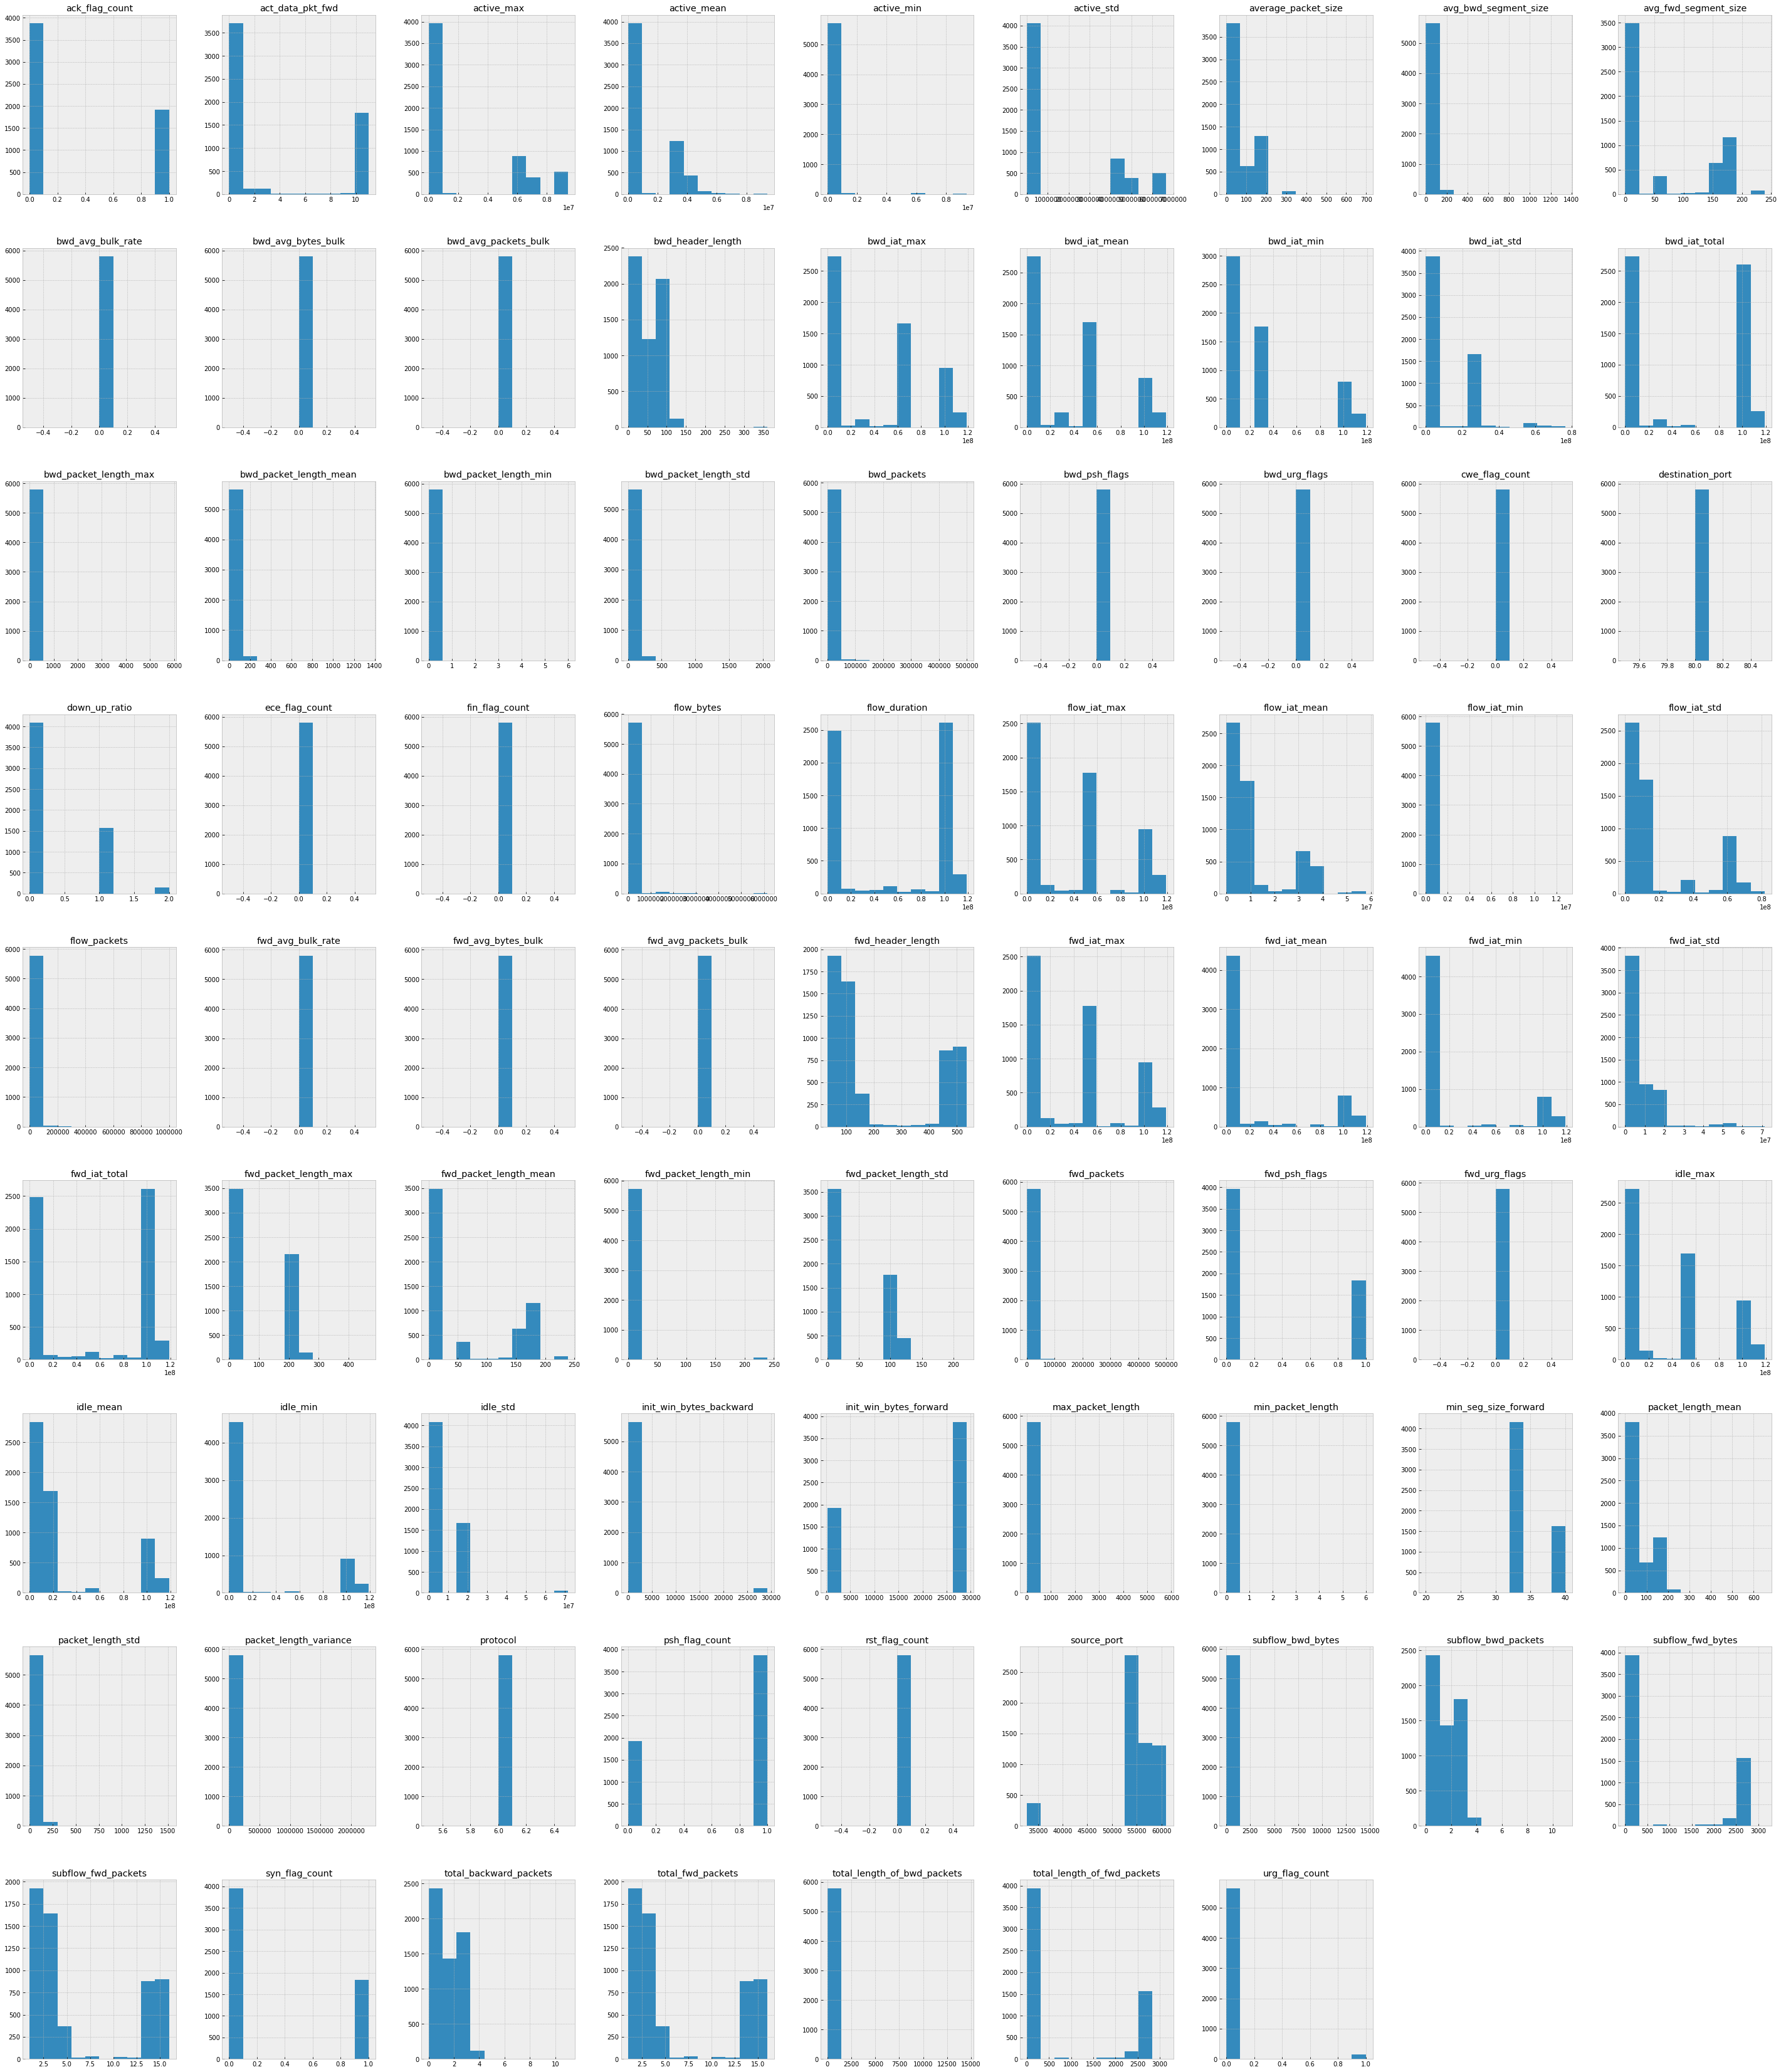

In [34]:
slowlorisdf.hist(figsize=(50,60))

## Merge both datasets

#### Scaling data

#### Dropping features having very close max and min values to avoid NaNs on scaling

In [88]:
diff = df[feat].max(axis=0) - df[feat].min(axis=0)
eps = 0.00000000001

feat = list(df[feat].columns[~(diff.abs() < eps)])

In [95]:
# Scaling only Numerical features
num_feat = feat

# Using MinMaxScaler
min_max_slowloris = MinMaxScaler()
min_max_slowloris_sim = MinMaxScaler()
# Fit scaler
slowlorisdf[num_feat] = pd.DataFrame(min_max_slowloris.fit_transform(
    slowlorisdf[num_feat].as_matrix()), columns=num_feat)
slowlorissimdf[num_feat] = pd.DataFrame(min_max_slowloris_sim.fit_transform(
    slowlorissimdf[num_feat].as_matrix()), columns=num_feat)

# Using MinMaxScaler
min_max_hulk = MinMaxScaler()
min_max_hulk_sim = MinMaxScaler()
# Fit scaler
hulkdf[num_feat] = pd.DataFrame(min_max_hulk.fit_transform(
    hulkdf[num_feat].as_matrix()), columns=num_feat)
hulksimdf[num_feat] = pd.DataFrame(min_max_hulk_sim.fit_transform(
    hulksimdf[num_feat].as_matrix()), columns=num_feat)


/home/talhajavaid32/anaconda2/lib/python2.7/site-packages/pandas/core/frame.py:2352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
